# HANDWRITTEN DIGITS RECOGNIZER

### Import Libraries

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import pickle

### Load Dataset

In [2]:
data = datasets.load_digits()
type(data)

sklearn.utils.Bunch

In [3]:
# Convert into Dataframe
digits = pd.DataFrame(data.data, columns = data.feature_names)
digits['target'] = data.target
digits.head()
# Shape = (1797, 65)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

### Visualize the Data

In [5]:
# Display 16 images from the given index
def displayDigits(index):
    fig = plt.figure(figsize = (15, 15))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(data.images[index + i], cmap = 'binary')
        plt.title(digits.target[index + i])
    plt.show()

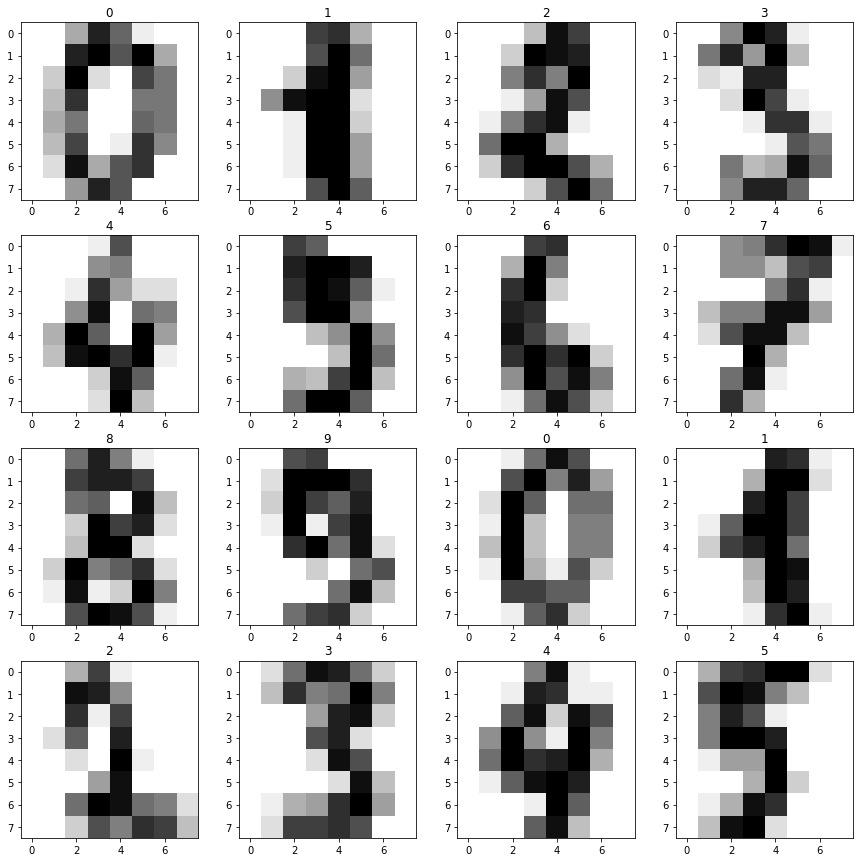

In [6]:
displayDigits(0)

### Preparing the Input Data

In [7]:
# Converting 2D image into 1D array.
x = data.images.reshape(len(data.images), -1)
y = data.target

In [8]:
# Splitting Data into Train and Test.
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = False)

### Building the Network and training the data

In [9]:
# Input layer with 8x8 nodes, 2 hidden layers with 52 nodes each and
# output layer with 10 nodes corresponding to the 10 classes of digits, from 0 to 9.

mlp = MLPClassifier(hidden_layer_sizes = (52, 52), activation = 'logistic', alpha = 1e-4, solver = 'sgd',
                    random_state = 1, learning_rate_init = 0.37, verbose = True)

### Predicting with Test data

In [10]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 2.27958680
Iteration 2, loss = 1.96261242
Iteration 3, loss = 1.27195643
Iteration 4, loss = 0.74629527
Iteration 5, loss = 0.28261138
Iteration 6, loss = 0.15903956
Iteration 7, loss = 0.09521188
Iteration 8, loss = 0.07267268
Iteration 9, loss = 0.04915504
Iteration 10, loss = 0.04143354
Iteration 11, loss = 0.03682052
Iteration 12, loss = 0.02971379
Iteration 13, loss = 0.02452768
Iteration 14, loss = 0.02206459
Iteration 15, loss = 0.01730491
Iteration 16, loss = 0.01398483
Iteration 17, loss = 0.01159335
Iteration 18, loss = 0.00997211
Iteration 19, loss = 0.00922914
Iteration 20, loss = 0.00827543
Iteration 21, loss = 0.00742258
Iteration 22, loss = 0.00692928
Iteration 23, loss = 0.00647381
Iteration 24, loss = 0.00605343
Iteration 25, loss = 0.00572746
Iteration 26, loss = 0.00546812
Iteration 27, loss = 0.00521708
Iteration 28, loss = 0.00495933
Iteration 29, loss = 0.00477235
Iteration 30, loss = 0.00464402
Iteration 31, loss = 0.00440771
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(52, 52),
              learning_rate_init=0.37, random_state=1, solver='sgd',
              verbose=True)

Text(0.5, 1.0, 'Loss')

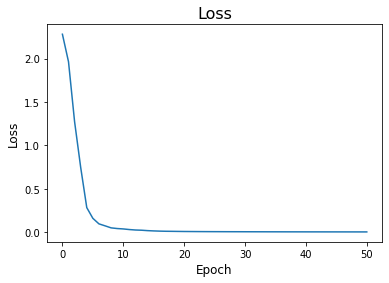

In [11]:
plt.plot(mlp.loss_curve_)
plt.ylabel('Loss', fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.title('Loss', fontsize = 16)

In [12]:
accuracy_score(y_test, mlp.predict(x_test))

0.9377777777777778

### Importing into Pickle file

In [13]:
pickle.dump(mlp, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))